## Gradient Boosting
Unlike Bagging and Random Forest, Gradient Boosting can cause overfitting. As a result, Gradient Boosting requires Hyperparameter tuning, taking more time to train. One advantage of Gradient Boosting is that each classifier is smaller, so predictions are faster in Gradient Boosting. AdaBoost is a subclass of Gradient Boosting; one weakness of AdaBoost is that misclassified samples cause overfitting; Gradient Boosting uses different loss functions, reducing this effect. 

In [9]:
import pandas as pd
import pylab as plt
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from tqdm import tqdm

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
def get_accuracy(X_train, X_test, y_train, y_test, model):
    return  {"test Accuracy":metrics.accuracy_score(y_test, model.predict(X_test)),"train Accuracy": metrics.accuracy_score(y_train, model.predict(X_train))}

In [33]:
def get_accuracy_boost(X,y,title,times=20,xlabel='Number Estimators',Learning_rate_=[0.2,0.4,0.6,1], n_est = 100):

    lines_array=['solid','--', '-.', ':']

    N_estimators=[n*2 for n in range(1,n_est//2)]
    
    train_acc=np.zeros((times,len(Learning_rate_),len(N_estimators)))
    test_acc=np.zeros((times,len(Learning_rate_),len(N_estimators)))


    #Iterate through different number of Learning rate  and average out the results  
    
    for n in tqdm(range(times)):
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
        for n_estimators in N_estimators:
            for j,lr in enumerate(Learning_rate_):


                model = XGBClassifier(objective=objective,learning_rate=lr,n_estimators=n_estimators,eval_metric='mlogloss')


                model.fit(X_train,y_train)



                Accuracy=get_accuracy(X_train, X_test, y_train, y_test,  model)



                train_acc[n,j,(n_estimators//2)-1]=Accuracy['train Accuracy']
                test_acc[n,j,(n_estimators//2)-1]=Accuracy['test Accuracy']
    



    fig, ax1 = plt.subplots()
    mean_test=test_acc.mean(axis=0)
    mean_train=train_acc.mean(axis=0)
    ax2 = ax1.twinx()

    for j,(lr,line) in enumerate(zip(Learning_rate_,lines_array)): 

        ax1.plot(mean_train[j,:],linestyle = line,color='b',label="Learning rate "+str(lr))
        ax2.plot(mean_test[j,:],linestyle = line, color='r',label=str(lr))

    ax1.set_ylabel('Training accuracy',color='b')
    ax1.legend()
    ax2.set_ylabel('Testing accuracy', color='r')
    ax2.legend()
    ax1.set_xlabel(xlabel)
    plt.show()

In [12]:
churn_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv")

churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [13]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [14]:
X=churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']]

In [15]:
y = churn_df['churn']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int32

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1)
print ('Train set', X_train.shape,  y_train.shape)
print ('Test set', X_test.shape,  y_test.shape)

Train set (140, 7) (140,)
Test set (60, 7) (60,)


In [22]:
from xgboost import XGBClassifier

In [23]:
n_estimators = 5 
random_state = 0

In [24]:
objective = 'binary:logistic'

In [25]:
learning_rate = 0.1

In [26]:
model =XGBClassifier(objective=objective,learning_rate=learning_rate,n_estimators=n_estimators,eval_metric='mlogloss')
model 

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [27]:
print("learning rate:", model.learning_rate)
print("lobjective:", model.objective)
print("n_estimators:", model.n_estimators)

learning rate: 0.1
lobjective: binary:logistic
n_estimators: 5


In [28]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
print(get_accuracy(X_train, X_test, y_train, y_test,  model))

{'test Accuracy': 0.7666666666666667, 'train Accuracy': 0.7714285714285715}


In [30]:
n_estimators=100
model =XGBClassifier(objective=objective,learning_rate=learning_rate,n_estimators=n_estimators)
model.fit(X_train, y_train)
print(get_accuracy(X_train, X_test, y_train, y_test,  model))

{'test Accuracy': 0.7, 'train Accuracy': 1.0}


100%|██████████| 10/10 [00:03<00:00,  2.67it/s]


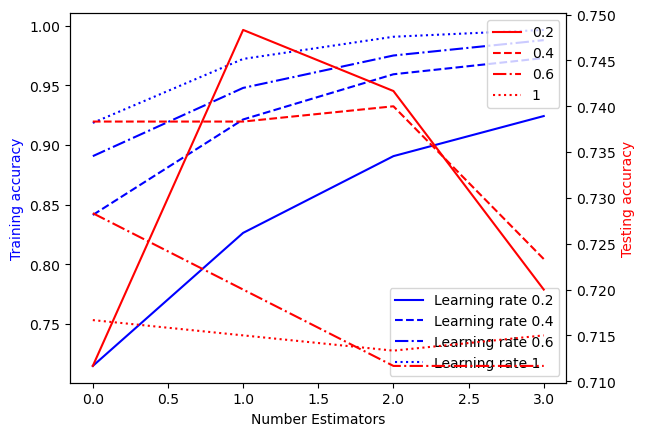

In [34]:
get_accuracy_boost(X,y,title="Training and Test Accuracy vs Weak Classifiers",times=10,xlabel='Number Estimators', n_est = 10)

In [35]:
eval_metric = "error"

In [36]:
eval_set = [(X_test, y_test)]

In [38]:
# Create a new model with eval_metric specified in the constructor
model_with_eval = XGBClassifier(objective=objective, learning_rate=learning_rate, n_estimators=n_estimators, eval_metric=eval_metric)
model_with_eval.fit(X_train, y_train, eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.23333
[1]	validation_0-error:0.23333
[1]	validation_0-error:0.23333
[2]	validation_0-error:0.23333
[3]	validation_0-error:0.23333
[2]	validation_0-error:0.23333
[3]	validation_0-error:0.23333
[4]	validation_0-error:0.23333
[4]	validation_0-error:0.23333
[5]	validation_0-error:0.20000
[6]	validation_0-error:0.20000
[7]	validation_0-error:0.20000
[5]	validation_0-error:0.20000
[6]	validation_0-error:0.20000
[7]	validation_0-error:0.20000
[8]	validation_0-error:0.20000
[9]	validation_0-error:0.20000
[8]	validation_0-error:0.20000
[9]	validation_0-error:0.20000
[10]	validation_0-error:0.20000
[11]	validation_0-error:0.21667
[12]	validation_0-error:0.21667
[10]	validation_0-error:0.20000
[11]	validation_0-error:0.21667
[12]	validation_0-error:0.21667
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.23333
[15]	validation_0-error:0.2

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'error'


In [40]:
# Get evaluation results from the model that was trained with eval_set
results = model_with_eval.evals_result()
print(results)

{'validation_0': OrderedDict({'error': [0.23333333333333334, 0.23333333333333334, 0.23333333333333334, 0.23333333333333334, 0.23333333333333334, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.21666666666666667, 0.21666666666666667, 0.23333333333333334, 0.25, 0.23333333333333334, 0.23333333333333334, 0.25, 0.25, 0.26666666666666666, 0.26666666666666666, 0.2833333333333333, 0.2833333333333333, 0.2833333333333333, 0.26666666666666666, 0.25, 0.21666666666666667, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.25, 0.26666666666666666, 0.2833333333333333, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.2833333333333333, 0.2833333333333333, 0.2833333333333333, 0.2833333333333333, 0.2833333333333333, 0.2833333333333333, 0.2833333333333333, 0.2833333333333333, 0.2833333333333333, 0.2833333333333333, 0.2833333333333333, 0.2833333333333333, 0.2833333333333333, 0.26666666666666666, 0.3, 0.2833333333333333, 0.2833333333333333, 0.283333333

In [41]:
plt.plot(range(0, len(results['validation_0']['error'])), results['validation_0']['error'])
plt.xlabel('iterations')
plt.ylabel('Misclassified Samples')

Text(0, 0.5, 'Misclassified Samples')

In [43]:
eval_metric='logloss'
eval_set = [(X_train, y_train), (X_test, y_test)]
# Create a new model with logloss metric specified in the constructor
model_logloss = XGBClassifier(objective=objective, learning_rate=learning_rate, n_estimators=n_estimators, eval_metric=eval_metric)
model_logloss.fit(X_train, y_train, eval_set=eval_set, verbose=False)
results = model_logloss.evals_result()

In [44]:
results.keys()

dict_keys(['validation_0', 'validation_1'])

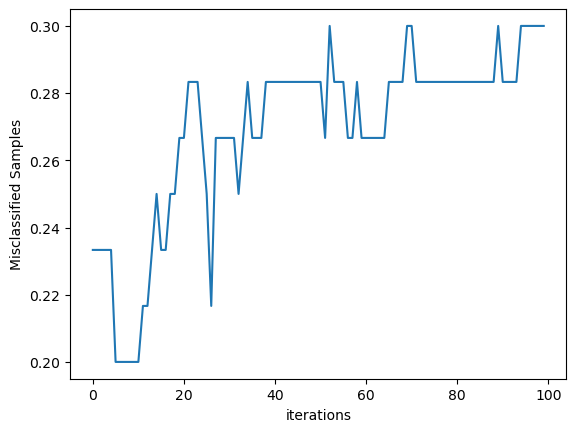

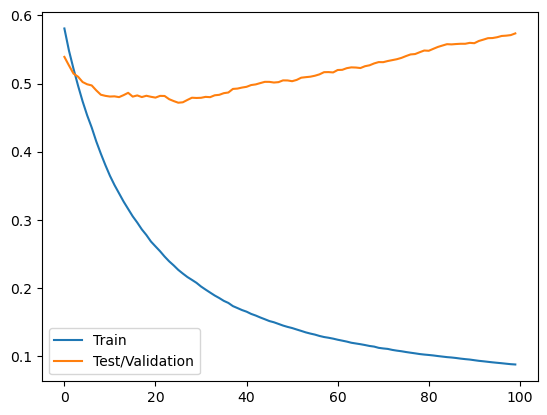

In [45]:
fig, ax = plt.subplots()
ax.plot( results['validation_0']['logloss'], label='Train')
ax.plot( results['validation_1']['logloss'], label='Test/Validation')
ax.legend()
plt.show()

## Early Stopping
Early Stopping is a way to prevent overfitting; we stop gradient descent based on a specified number of epochs over which no improvement is observed using the evaluation set . The input parameter is  `early_stopping_rounds`.

In [46]:
early_stopping_rounds = 10

In [50]:
eval_set = [(X_test, y_test)]
eval_metric='logloss'
# Create a new model with early stopping and logloss metric specified in the constructor
model_early_stop = XGBClassifier(objective=objective, learning_rate=learning_rate, n_estimators=n_estimators, 
                                eval_metric=eval_metric, early_stopping_rounds=early_stopping_rounds)
model_early_stop.fit(X_train, y_train, eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.53906
[1]	validation_0-logloss:0.52653
[1]	validation_0-logloss:0.52653
[2]	validation_0-logloss:0.51457
[3]	validation_0-logloss:0.50999
[4]	validation_0-logloss:0.50221
[2]	validation_0-logloss:0.51457
[3]	validation_0-logloss:0.50999
[4]	validation_0-logloss:0.50221
[5]	validation_0-logloss:0.49890
[6]	validation_0-logloss:0.49723
[5]	validation_0-logloss:0.49890
[6]	validation_0-logloss:0.49723
[7]	validation_0-logloss:0.48998
[8]	validation_0-logloss:0.48361
[7]	validation_0-logloss:0.48998
[8]	validation_0-logloss:0.48361
[9]	validation_0-logloss:0.48195
[10]	validation_0-logloss:0.48095
[11]	validation_0-logloss:0.48123
[12]	validation_0-logloss:0.48010
[9]	validation_0-logloss:0.48195
[10]	validation_0-logloss:0.48095
[11]	validation_0-logloss:0.48123
[12]	validation_0-logloss:0.48010
[13]	validation_0-logloss:0.48302
[14]	validation_0-logloss:0.48641
[15]	validation_0-logloss:0.48084
[13]	validation_0-logloss:0.48302
[14]	validation_0-logloss:0.48641

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,10
,enable_categorical,False
,eval_metric,'logloss'


In [51]:
print(get_accuracy(X_train, X_test, y_train, y_test,  model))

{'test Accuracy': 0.7, 'train Accuracy': 1.0}


In [52]:
objective='binary:logistic'
learning_rate=0.1
n_estimators=10
model =XGBClassifier(objective=objective,learning_rate=learning_rate,n_estimators=n_estimators,eval_metric='mlogloss')
model.fit(X_train, y_train)
print(get_accuracy(X_train, X_test, y_train, y_test,  model))

{'test Accuracy': 0.8, 'train Accuracy': 0.85}


In [53]:
max_depth=3

In [54]:
model =XGBClassifier(objective=objective,learning_rate=learning_rate,n_estimators=n_estimators,eval_metric='mlogloss',max_depth=max_depth)
model.fit(X_train, y_train)
print(get_accuracy(X_train, X_test, y_train, y_test,  model))

{'test Accuracy': 0.7833333333333333, 'train Accuracy': 0.8142857142857143}


In [55]:
min_child_weight=4

In [56]:
model =XGBClassifier(objective=objective,learning_rate=learning_rate,n_estimators=n_estimators,eval_metric='mlogloss',min_child_weight=4)
model.fit(X_train, y_train)
print(get_accuracy(X_train, X_test, y_train, y_test,  model))

{'test Accuracy': 0.7833333333333333, 'train Accuracy': 0.7928571428571428}


In [57]:
gamma=1
reg_lambda=2
alpha=1
model =XGBClassifier(objective=objective,learning_rate=learning_rate,n_estimators=n_estimators,eval_metric='mlogloss',gamma=gamma,reg_lambda=reg_lambda,alpha=alpha)
model.fit(X_train, y_train)
print(get_accuracy(X_train, X_test, y_train, y_test,  model))

{'test Accuracy': 0.7833333333333333, 'train Accuracy': 0.7785714285714286}
